# AH2179 Applied AI in Transportation
## Module3 Development of classification models for mode choices
### Nutta Sittirash

Find the best classification model and the corresonding hyperparameters,\
that accurately predicts these choices (travel mode) using the grid search.

**The model with the highest accuracy score are:**

LR with dummy encoding: accuracy score = 0.5746753246753247\
XGBoost with any encoding method: accuracy score = 0.5746753246753247

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

### Load and prepare the data

In [2]:
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)
data.head()

,ID,time_car,cost_car,time_bus,cost_bus,access_bus,time_air,cost_air,access_air,service_air,time_rail,cost_rail,access_rail,service_rail,choice
0,1,275,50,330,35,20,80,65,55,food,120,45,5,no-frills,air
1,2,275,45,330,15,5,70,110,40,wifi,170,55,25,food,rail
2,3,275,45,390,15,25,70,80,55,no-frills,155,35,5,no-frills,rail
3,4,300,45,300,15,10,60,110,40,wifi,155,65,20,no-frills,rail
4,5,390,35,390,35,10,60,95,45,wifi,155,65,15,food,rail


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            3080 non-null   int64 
 1   time_car      3080 non-null   int64 
 2   cost_car      3080 non-null   int64 
 3   time_bus      3080 non-null   int64 
 4   cost_bus      3080 non-null   int64 
 5   access_bus    3080 non-null   int64 
 6   time_air      3080 non-null   int64 
 7   cost_air      3080 non-null   int64 
 8   access_air    3080 non-null   int64 
 9   service_air   3080 non-null   object
 10  time_rail     3080 non-null   int64 
 11  cost_rail     3080 non-null   int64 
 12  access_rail   3080 non-null   int64 
 13  service_rail  3080 non-null   object
 14  choice        3080 non-null   object
dtypes: int64(12), object(3)
memory usage: 361.1+ KB


In [4]:
data.groupby('choice').size()

choice
air      705
bus      109
car      978
rail    1288
dtype: int64

### Model 1 - Logistis Regression

**Side Note**

**best parameter: 'C' = 0.01**

**LR with Dummy Encoding:** has the highest accuracy score.

**LR with One-Hot Encoding:**\
{'C': 0.1}\
Accuracy: 0.5665584415584416\
Precision: [0.54347826 0.25       0.48       0.6459854 ]\
Recall: [0.54347826 0.04545455 0.48730964 0.68339768]

**LR with Label Encoding:**\
{'C': 0.1}\
Accuracy: 0.5698051948051948\
Precision: [0.56521739 0.25       0.48292683 0.64312268]\
Recall: [0.56521739 0.04545455 0.50253807 0.66795367]

In [ ]:
# Use only 1000 records
df = df.iloc[:1000]

df = df.drop(['ID', 'time_car','time_bus','cost_car','cost_bus','access_car', 'access_bus'], axis=1)

In [68]:
#(3) Dummy Encoding
df=data.copy()
dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df=df.drop(['service_air', 'service_rail'],axis=1)

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

# LR

params = {
    #'C': [0.01, 0.1, 1, 10, 100],
    'C': [0.002, 0.004, 0.006, 0.008, 0.010],
}
model_LR3 = LogisticRegression(max_iter=1000, random_state=0)

grid_search = GridSearchCV(estimator=model_LR3, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)

{'C': 0.01}


Accuracy: 0.5746753246753247
Precision: [0.55244755 0.25       0.48803828 0.66153846]
Recall: [0.57246377 0.04545455 0.5177665  0.66409266]


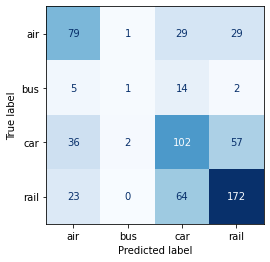

In [69]:
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model_LR3 = grid_search.best_estimator_
model_LR3.fit(x_train, y_train)
cmd.from_estimator(model_LR3, x_test, y_test,cmap='Blues',colorbar=False)

print(f'Accuracy: {accuracy_score(y_test,model_LR3.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model_LR3.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model_LR3.predict(x_test),average=None)}')

### Model 2 - KNN

**Side Note**

**best parameter: 'n_neighbors': 9, 'weights': 'uniform'**

**KNN with One-Hot Encoding:** has the highest accuracy score.

**KNN with Dummy Encoding:**\
{'n_neighbors': 100, 'weights': 'distance'}\
Accuracy: 0.525974025974026\
Precision: [0.50322581 0.25       0.43147208 0.61538462]\
Recall: [0.56521739 0.04545455 0.43147208 0.61776062]

**KNN with Label Encoding:**\
{'n_neighbors': 100, 'weights': 'distance'}\
Accuracy: 0.525974025974026\
Precision: [0.50322581 0.25       0.43147208 0.61538462]\
Recall: [0.56521739 0.04545455 0.43147208 0.61776062]


In [48]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

df = pd.get_dummies(data, columns=['service_air', 'service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

k_values = range(100, 1000)
cv_scores = []

for k in k_values:
 knn = KNeighborsClassifier(n_neighbors=k)
 scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
 cv_scores.append(scores.mean())

optimal_k = k_values[np.argmax(cv_scores)]
optimal_accuracy = max(cv_scores)

# Print the results
print("Optimal K:", optimal_k)
print("Optimal Accuracy:", optimal_accuracy)

Optimal K: 100
Optimal Accuracy: 0.5227272727272727


In [22]:
# One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

# KNN
params = {
    #'n_neighbors': [100], # 0.525974025974026  
    #'n_neighbors': [100, 200, 300, 400],
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}
model_KNN1=KNeighborsClassifier()

grid_search = GridSearchCV(estimator=model_KNN1, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 9, 'weights': 'uniform'}


Accuracy: 0.5324675324675324
Precision: [0.49710983 0.         0.4301676  0.64705882]
Recall: [0.62318841 0.         0.39086294 0.63706564]


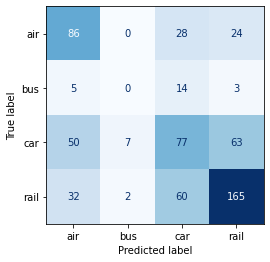

In [23]:
best_score = grid_search.best_score_
model_KNN1 = grid_search.best_estimator_
cmd.from_estimator(model_KNN1, x_test, y_test,cmap='Blues',colorbar=False)

print(f'Accuracy: {accuracy_score(y_test,model_KNN1.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model_KNN1.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model_KNN1.predict(x_test),average=None)}')

### Model 3 - RF

**Side Note**

**Best parameter: 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1000**

**RF with One-Hot Encoding:** has the highest accuracy score.

**RF with Dummy Encoding and Label Encoding:**\
Accuracy: 0.5340909090909091\
Precision: [0.52142857 0.25       0.43781095 0.61623616]\
Recall: [0.52898551 0.04545455 0.44670051 0.64478764]

In [40]:
# One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(3)RF
params = { 
     #'n_estimators': [800, 900, 1000],
     #'max_depth': [None, 10, 20, 30],
     #'min_samples_split': [1, 2, 3],
     #'min_samples_leaf': [1, 2, 4]
     'n_estimators': [1000],
     'max_depth': [10],
     'min_samples_split': [2],
     'min_samples_leaf': [4]
 }
model_RF1 = RandomForestClassifier(random_state=0)
#scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy', error_score='raise')
grid_search = GridSearchCV(estimator=model_RF1, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1000}


Accuracy: 0.5373376623376623
Precision: [0.52898551 0.25       0.44334975 0.61623616]
Recall: [0.52898551 0.04545455 0.45685279 0.64478764]


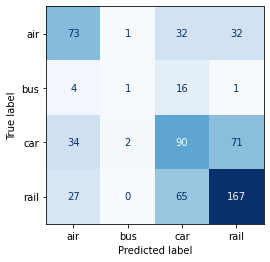

In [41]:
best_score = grid_search.best_score_
model_RF1 = grid_search.best_estimator_
cmd.from_estimator(model_RF1, x_test, y_test,cmap='Blues',colorbar=False)

print(f'Accuracy: {accuracy_score(y_test,model_RF1.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model_RF1.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model_RF1.predict(x_test),average=None)}')

### Model 3 - XGBoost

**Side Note**

**Best parameter: 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300**

**XGBoost with all types of Encoding:** has identical accuracy score.

Accuracy: 0.5746753246753247\
Precision: [0.57462687 1.         0.4841629  0.651341  ]\
Recall: [0.55797101 0.         0.54314721 0.65637066]


In [46]:
# One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

params = {
     #'learning_rate': [0.01, 0.1, 0.2],
     #'n_estimators': [100, 200, 300],
     #'max_depth': [3, 4, 5]
     'learning_rate': [0.01],
     'n_estimators': [300],
     'max_depth': [3]
 }
map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
y_train = y_train.map(map)
y_test = y_test.map(map)
model_XGB1 =  XGBClassifier()
grid_search = GridSearchCV(estimator=model_XGB1, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


Accuracy: 0.5746753246753247
Precision: [0.57462687 1.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]


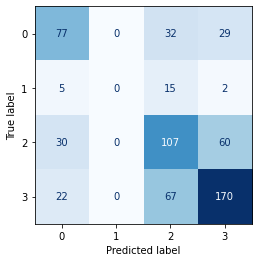

In [52]:
best_score = grid_search.best_score_
model_RF1 = grid_search.best_estimator_
cmd.from_estimator(model_RF1, x_test, y_test,cmap='Blues',colorbar=False)

print(f'Accuracy: {accuracy_score(y_test,model_RF1.predict(x_test))}')
from sklearn.metrics import precision_score
print(f'Precision: {precision_score(y_test,model_RF1.predict(x_test),average=None, zero_division=1)}')
print(f'Recall: {recall_score(y_test,model_RF1.predict(x_test),average=None)}')

In [50]:
#(2) Label Encoding
encoder = LabelEncoder()
df=data.copy()
df['service_air'] = encoder.fit_transform(df['service_air'])
df['service_rail'] = encoder.fit_transform(df['service_rail'])

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

params = {
     #'learning_rate': [0.01, 0.1, 0.2],
     #'n_estimators': [100, 200, 300],
     #'max_depth': [3, 4, 5]
     'learning_rate': [0.01],
     'n_estimators': [300],
     'max_depth': [3]
 }
map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
y_train = y_train.map(map)
y_test = y_test.map(map)
model_XGB2 =  XGBClassifier()
grid_search = GridSearchCV(estimator=model_XGB2, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


Accuracy: 0.5746753246753247
Precision: [0.57462687 1.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]


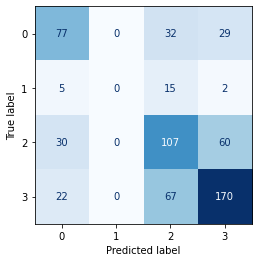

In [53]:
best_score = grid_search.best_score_
model_XGB2 = grid_search.best_estimator_
cmd.from_estimator(model_XGB2, x_test, y_test,cmap='Blues',colorbar=False)

print(f'Accuracy: {accuracy_score(y_test,model_XGB2.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model_XGB2.predict(x_test),average=None, zero_division=1)}')
print(f'Recall: {recall_score(y_test,model_XGB2.predict(x_test),average=None)}')

In [56]:
#(3) Dummy Encoding
df=data.copy()
dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df=df.drop(['service_air', 'service_rail'],axis=1)

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

params = {
     'learning_rate': [0.01],
     'n_estimators': [300],
     'max_depth': [3]
 }
map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
y_train = y_train.map(map)
y_test = y_test.map(map)
model_XGB3 =  XGBClassifier()

grid_search = GridSearchCV(estimator=model_XGB3, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


Accuracy: 0.5746753246753247
Precision: [0.57462687 1.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]


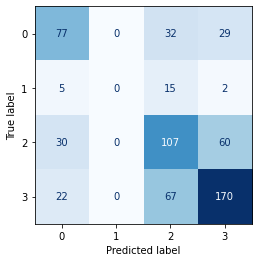

In [57]:
best_score = grid_search.best_score_
model_XGB3 = grid_search.best_estimator_
cmd.from_estimator(model_XGB3, x_test, y_test,cmap='Blues',colorbar=False)

print(f'Accuracy: {accuracy_score(y_test,model_XGB3.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model_XGB3.predict(x_test),average=None, zero_division=1)}')
print(f'Recall: {recall_score(y_test,model_XGB3.predict(x_test),average=None)}')

### Model 4 - SVM

**Side Note**

**Best parameter: 'C' = 0.1**

**SVM with Dummy Coding:** has identical accuracy score.

**SVM with Label Encoding:**\
Accuracy: 0.551948051948052\
Precision: [0.51948052 1.         0.45959596 0.64015152]\
Recall: [0.57971014 0.         0.46192893 0.65250965]


**SVM with One-Hot Encoding:**\
Accuracy: 0.564935064935065\
Precision: [0.54861111 1.         0.4556962  0.68510638]\
Recall: [0.57246377 0.         0.54822335 0.62162162

In [66]:
#(3) Dummy Encoding
df=data.copy()
dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df=df.drop(['service_air', 'service_rail'],axis=1)

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

params = {
    'C': [0.1],
}

model_SVC3= SVC(kernel="linear")

grid_search = GridSearchCV(estimator=model_SVC3, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'C': 0.1}


Accuracy: 0.5665584415584416
Precision: [0.54054054 1.         0.46606335 0.67206478]
Recall: [0.57971014 0.         0.52284264 0.64092664]


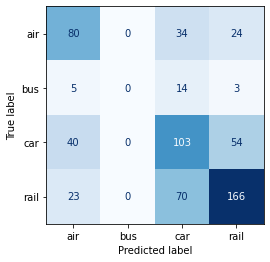

In [67]:
best_score = grid_search.best_score_
model_SVC3 = grid_search.best_estimator_
cmd.from_estimator(model_SVC3, x_test, y_test,cmap='Blues',colorbar=False)

print(f'Accuracy: {accuracy_score(y_test,model_SVC3.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model_SVC3.predict(x_test),average=None, zero_division=1)}')
print(f'Recall: {recall_score(y_test,model_SVC3.predict(x_test),average=None)}')